# 0) 준비

In [1]:
import numpy as np
import pandas as pd
import copy
import matplotlib.pyplot as plt

import sample_data
from meanshift import mean_shift, mean_shift_with_history

%matplotlib inline

# # PyCharm에서 인터랙티브 창 띄우기
# import matplotlib
# matplotlib.use('TkAgg')

def calc_euclidean_distance(p1, p2):
    return np.sqrt(np.sum((p1 - p2) ** 2))

# 1) 데이터 샘플 불러오기

(9, 2)
[[ 1.   2. ]
 [ 1.5  1.8]
 [ 5.   8. ]
 [ 8.   8. ]
 [ 1.   0.6]
 [ 9.  11. ]
 [ 8.   2. ]
 [10.   2. ]
 [ 9.   3. ]]


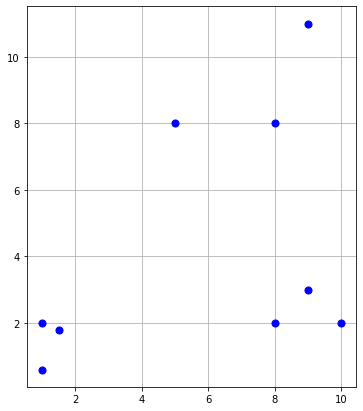

In [2]:
X = sample_data.sample1

# 데이터 확인
print(X.shape)
print(X)

# 좌표에 그리기
plt.figure(figsize=(7, 7))
plt.scatter(X[:, 0], X[:, 1], color='b', s=50, zorder=2)
plt.grid()
# plt.axis([0, 12, 0, 12])
plt.gca().set_aspect("equal")
plt.show()

# 2) Meanshif 알고리즘을 이용한 군집화 수행

In [3]:
# meanshift 수행
bandwidth = 4
centroids = mean_shift(X, bandwidth)

# 군집화 단계 (알고리즘 5-6의 line 12~14에 해당)
final_centroids = np.zeros_like(centroids)
for i in range(len(centroids)):
    in_bandwidth = []
    for j in range(len(centroids)):
        if calc_euclidean_distance(centroids[i], centroids[j]) <= bandwidth:
            in_bandwidth.append(centroids[j])

    final_centroids[i] = np.average(in_bandwidth, axis=0)
unique_centroids = np.unique(final_centroids, axis=0)

clusters = dict(zip(range(len(unique_centroids)), np.array([unique_centroids[i,:] for i in range(len(unique_centroids))])))
getcluster = lambda val : [k for k,v in clusters.items() if (v == val).sum()==len(val)][0]
df = pd.DataFrame(columns=['Sample_data','Centroids','Clusters'])
df['Sample_data'] = tuple(X)
df['Centroids']   = tuple(final_centroids)
df['Clusters']    = [getcluster(final_centroids[i]) for i in range(len(final_centroids))]
df

,Sample_data,Centroids,Clusters
0,"(1.0, 2.0)","(1.1689908211891809, 1.4761429229026488)",0
1,"(1.5, 1.8)","(1.1689908211891809, 1.4761429229026488)",0
2,"(5.0, 8.0)","(7.388708140475834, 8.853876714191337)",1
3,"(8.0, 8.0)","(7.388708140475834, 8.853876714191337)",1
4,"(1.0, 0.6)","(1.1689908211891809, 1.4761429229026488)",0
5,"(9.0, 11.0)","(7.388708140475834, 8.853876714191337)",1
6,"(8.0, 2.0)","(9.0, 2.3429309039761885)",2
7,"(10.0, 2.0)","(9.0, 2.3429309039761885)",2
8,"(9.0, 3.0)","(9.0, 2.3429309039761885)",2


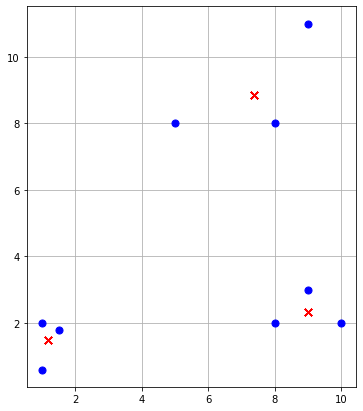

In [4]:
# 그래프에 결과 그리기
plt.figure(figsize=(7, 7))
plt.scatter(X[:, 0], X[:, 1], color='b', s=50, zorder=2)
for c in centroids:
    plt.scatter(unique_centroids[:, 0], unique_centroids[:, 1], color='r', marker='x', s=50, zorder=2)
plt.grid()
# plt.axis([0, 12, 0, 12])
plt.gca().set_aspect("equal")
plt.show()

# +) 중심점 업데이트 내역 확인하기

In [5]:
# meanshift 수행
bandwidth = 4
centroids, history = mean_shift_with_history(X, bandwidth)

# 중심점 업데이트 내역 테이블 생성
hist = copy.deepcopy(history)
centroids = np.round(centroids, 2)
n_iter = max([len(arr) for arr in hist.values()])
columns = ['Sample_data', 'Centroids']
for i in range(n_iter):
    columns.append('Iter #%d' % i)
df = pd.DataFrame(columns=columns)

for i in range(len(X)):
    n = len(hist[i])
    
    for j in range(n_iter):
        if j < n:
            hist[i][j] = (round(hist[i][j][0], 2), round(hist[i][j][1], 2))
        else:
            hist[i].append('')

df['Sample_data'] = tuple(X)
df['Centroids']   = tuple(centroids)
for i in range(n_iter):
    points = [hist[j][i] for j in range(len(X))]
    df['Iter #%d' % i] = tuple(points)

df

C:\Users\suh\AppData\Roaming\Python\Python37\site-packages\numpy-1.19.1-py3.7-win-amd64.egg\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


,Sample_data,Centroids,Iter #0,Iter #1,Iter #2,Iter #3,Iter #4,Iter #5,Iter #6,Iter #7,Iter #8,Iter #9,Iter #10,Iter #11
0,"(1.0, 2.0)","(1.17, 1.48)","(1.0, 2.0)","(1.17, 1.5)","(1.17, 1.48)","(1.17, 1.48)",,,,,,,,
1,"(1.5, 1.8)","(1.17, 1.48)","(1.5, 1.8)","(1.17, 1.49)","(1.17, 1.48)",,,,,,,,,
2,"(5.0, 8.0)","(7.39, 8.85)","(5.0, 8.0)","(6.09, 8.0)","(6.38, 8.0)","(6.91, 8.53)","(7.18, 8.7)","(7.29, 8.78)","(7.35, 8.82)","(7.37, 8.84)","(7.38, 8.85)","(7.38, 8.85)","(7.39, 8.85)","(7.39, 8.85)"
3,"(8.0, 8.0)","(7.39, 8.85)","(8.0, 8.0)","(7.44, 8.76)","(7.39, 8.84)","(7.39, 8.85)","(7.39, 8.85)",,,,,,,
4,"(1.0, 0.6)","(1.17, 1.48)","(1.0, 0.6)","(1.16, 1.43)","(1.17, 1.47)","(1.17, 1.48)",,,,,,,,
5,"(9.0, 11.0)","(7.39, 8.85)","(9.0, 11.0)","(8.65, 9.95)","(8.55, 9.64)","(7.87, 9.26)","(7.61, 9.04)","(7.49, 8.94)","(7.44, 8.89)","(7.41, 8.87)","(7.4, 8.86)","(7.39, 8.86)","(7.39, 8.86)","(7.39, 8.85)"
6,"(8.0, 2.0)","(9.0, 2.34)","(8.0, 2.0)","(8.92, 2.33)","(8.99, 2.34)","(9.0, 2.34)",,,,,,,,
7,"(10.0, 2.0)","(9.0, 2.34)","(10.0, 2.0)","(9.08, 2.33)","(9.01, 2.34)","(9.0, 2.34)",,,,,,,,
8,"(9.0, 3.0)","(9.0, 2.34)","(9.0, 3.0)","(9.0, 2.36)","(9.0, 2.34)",,,,,,,,,


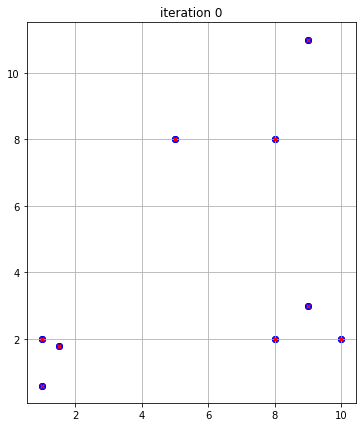

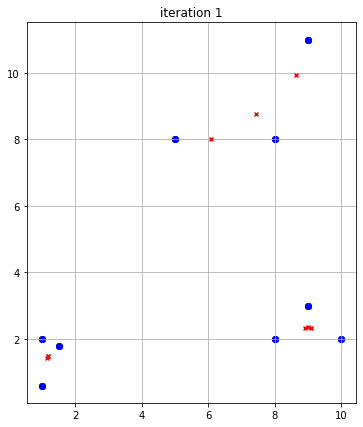

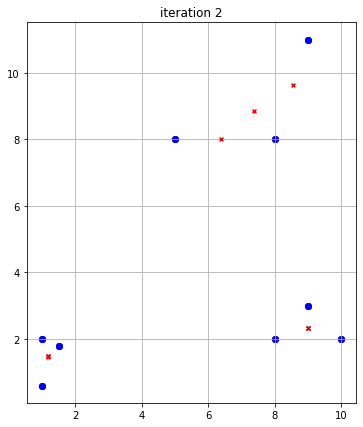

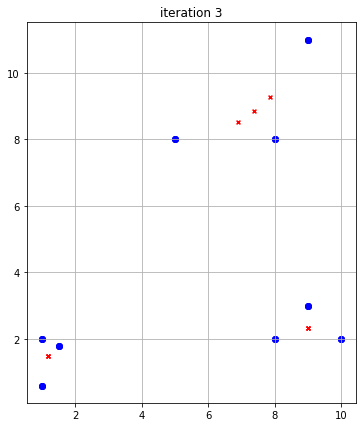

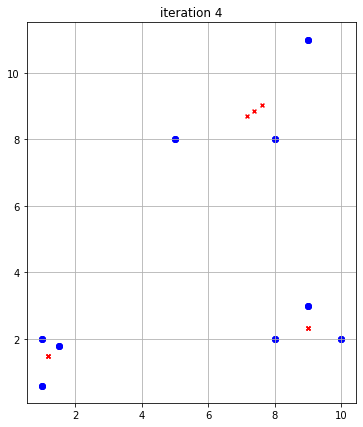

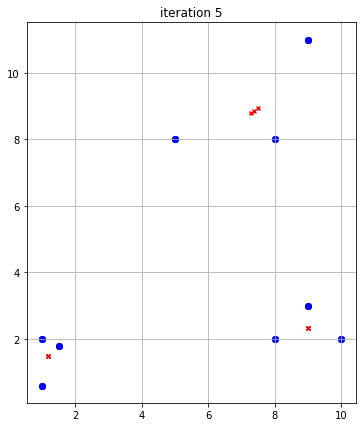

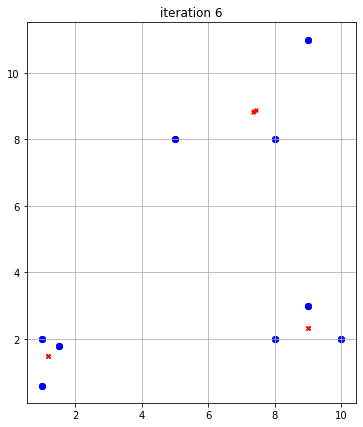

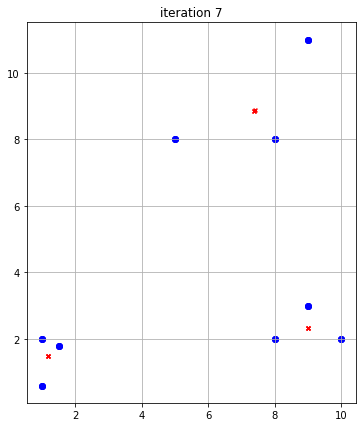

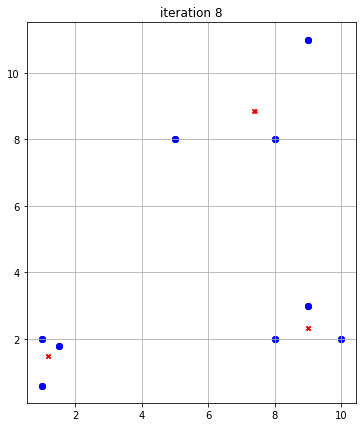

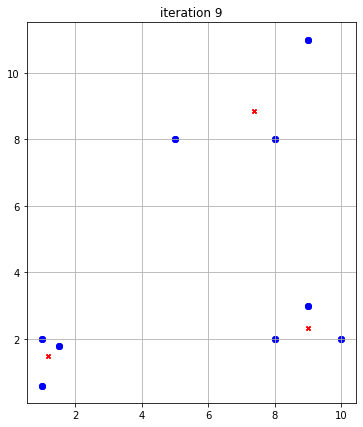

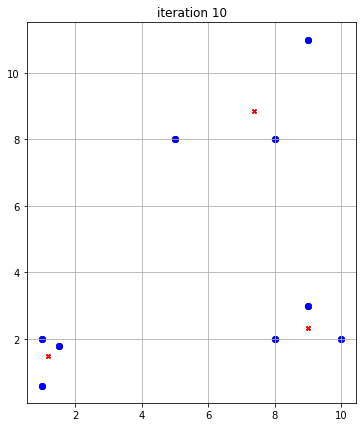

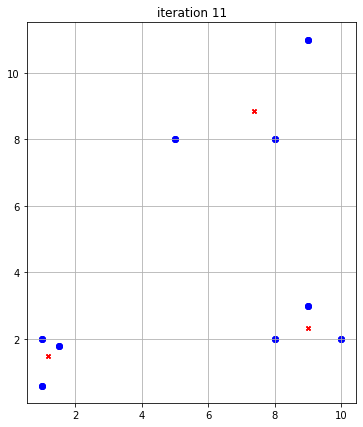

In [6]:
# 중심점 업데이트 내역 시각화
hist = copy.deepcopy(history)
for i in range(len(X)):
    n = len(hist[i])
    
    for j in range(n_iter):
        if j < n:
            hist[i][j] = (round(hist[i][j][0], 2), round(hist[i][j][1], 2))
        else:
            hist[i].append(hist[i][-1])
                
for i in range(n_iter):
    plt.figure(figsize=(7, 7))
    
    for j in range(len(X)):
        plt.scatter(X[:,0], X[:,1], color='b', marker='o',  s=30, zorder=1)
        plt.scatter(hist[j][i][0], hist[j][i][1], color='r', marker='x',  s=15, zorder=2)
    plt.title('iteration %d'%i)
    plt.grid()
    plt.gca().set_aspect("equal")
    plt.show() 